<a href="https://colab.research.google.com/github/RickyHRazzaq/Stroke-Dataset-Prediction-and-EDA/blob/main/Stroke_Dataset_Prediction_and_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Penyakit stroke adalah penyakit gangguan peredaran darah ke otak akibat penyumbatan pembuluh darah atau pembuluh darah yang pecah. Penyakit stroke termasuk penyakit yang sangat ditakuti oleh kebanyakan orang di seluruh dunia, termasuk di Indonesia, karena bisa berakibat lumpuhnya sebagian atau seluruh dari organ tubuh pengidapnya. Penyakit stroke bisa berakibat lebih fatal yang bahkan dapat merenggut nyawa.

Terdapat beberapa faktor yang menyebabkan stroke. Menurut beberapa literatur, berita, dan website, faktor yang sangat berpengaruh terhadap stroke adalah hipertensi. Apabila seseorang memiliki riwayat hipertensi, maka kemungkinan dan risiko seseorang tersebut terkena stroke akan lebih tinggi. Namun, di Indonesia sendiri masih banyak terjadi kasus salah prediksi dan diagnosa terhadap kecenderungan seseorang terkena stroke. Bahkan, banyak kasus seseorang didiagnosa menderita stroke namun tidak memiliki riwayat penyakit hipertensi. Hal ini menjadi concern beberapa pihak, terutama di sektor kesehatan terkait prediksi penyakit stroke seseorang

Pada masa dengan teknologi yang maju seperti sekarang, permasalahan mengenai prediksi penyakit stroke ini dapat diselesaikan dengan menggunakan data analytics. Pemanfaatan data analytics sudah banyak ditemukan di berbagai sektor, seperti finansial, pemerintahan, dan tentunya kesehatan. Didalam data analytics dapat dibentuk model machine learning yang mampu melakukan prediksi penyakit stroke seseorang berdasarkan variabel-variabel yang mempengaruhinya. Hal ini tentunya diharapkan mampu menyelesaikan permasalahan yang menjadi concern banyak pihak di bidang kesehatan Indonesia.

Tujuan dari project ini adalah
1. Membuktikan hipertensi merupakan faktor paling berpengaruh terhadap penyakit
stroke
2. Menentukan faktor yang sangat berpengaruh terhadap terjadinya penyakit stroke
seseorang
3. Menentukan model analitika data terbaik untuk prediksi penyakit stroke

# Import Library and Read Data

**Library**

In [ ]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

Penulis menggunakan dataset bernama “Stroke Prediction Dataset” yang berisi 5110 baris dan 12 kolom yaitu kolom ID, gender, age, hypertension, heart disease, ever married, work type, residence type, avg glucose level, bmi, smoking status, dan stroke. Data yang digunakan pada pengerjaan tugas ini didapat melalui sebuah web data science yaitu kaggle.com. Dataset mengenai penyakit stroke ini dibuat oleh original author bernama fedesoriano. Dataset ini menduduki peringkat pertama sebagai dataset yang paling banyak memperoleh upvote. Hal ini mengindikasikan bahwa dataset ini kredibel untuk dipelajari lebih lanjut. Data-data ini dapat dilihat selengkapnya pada link berikut :



https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [ ]:
#load data
ds = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Data Understanding

In [ ]:
#melihat jumlah baris dan kolom pada dataset
ds.shape

(5110, 12)

ds.shape() berguna untuk melihat jumlah kolom dan baris dari dataset.

In [ ]:
#melihat 20 baris data teratas
ds.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.651351,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,29.441026,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [ ]:
#info setiap kolom di dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#statistika deskriptif dari dataset
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Cek Missing Value

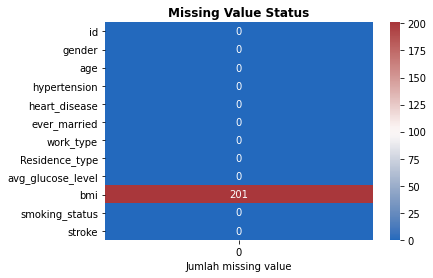

In [ ]:
#cek missing value
plt.title('Missing Value Status',fontweight='bold')
grafikmissing = sns.heatmap(ds.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
grafikmissing.set_xlabel('Jumlah missing value')
plt.show()

In [ ]:
ds.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Ternyata terdapat 201 missing value pada BMI

In [ ]:
# cek duplikasi data
ds.duplicated().any()

False

# Data Exploratory

**1. Jumlah data stroke dan non-stroke**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


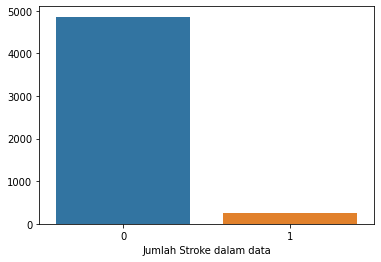

In [ ]:
#membuat grafik jumlah data pada kolom stroke
xs = ds['stroke'].value_counts().index
ys = ds['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Jumlah Stroke dalam data")
plt.show()

Dapat dilihat bahwa data bersifat imbalance sehingga dibutuhkan penyesuaian pada data.

Penyesuaian ini diperlukan agar data dapat diolah lebih lanjut dan tidak menghasilkan hasil yang bias

**2. Eksplorasi Data Gender**

a. Sebaran Gender pada dataset

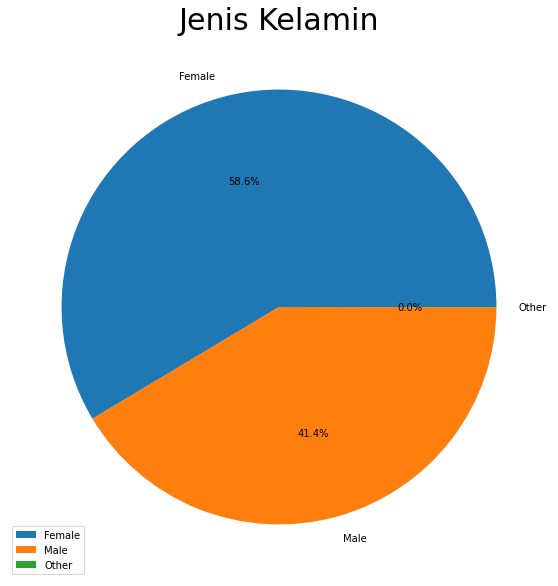

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['gender'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Jenis Kelamin", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Jumlah setiap gender terhadap variabel stroke

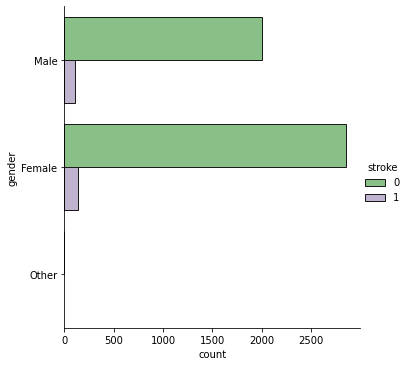

In [ ]:
sns.catplot(y="gender", hue="stroke", kind="count", palette="Accent", edgecolor=".1", data=ds)

c. Persentase gender yang terkena stroke

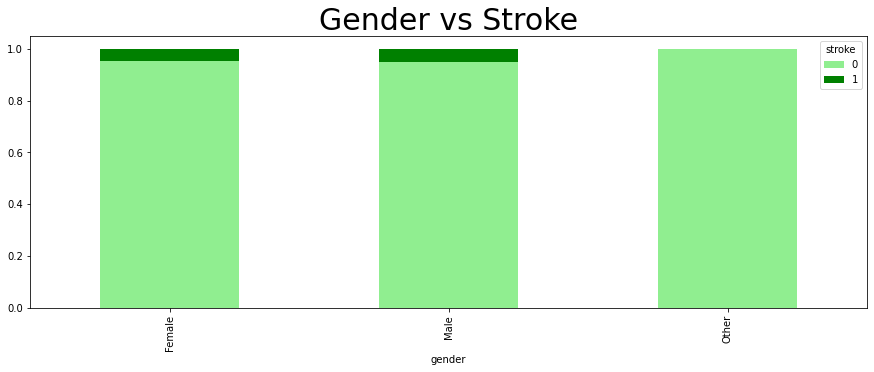

In [ ]:
jekel = pd.crosstab(ds['gender'], ds['stroke'], normalize='index')

jekel.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])

plt.title("Gender vs Stroke", fontsize = 30)
plt.show()

**3. Eksplorasi Data Hypertension**

a. Sebaran Hypertension pada dataset

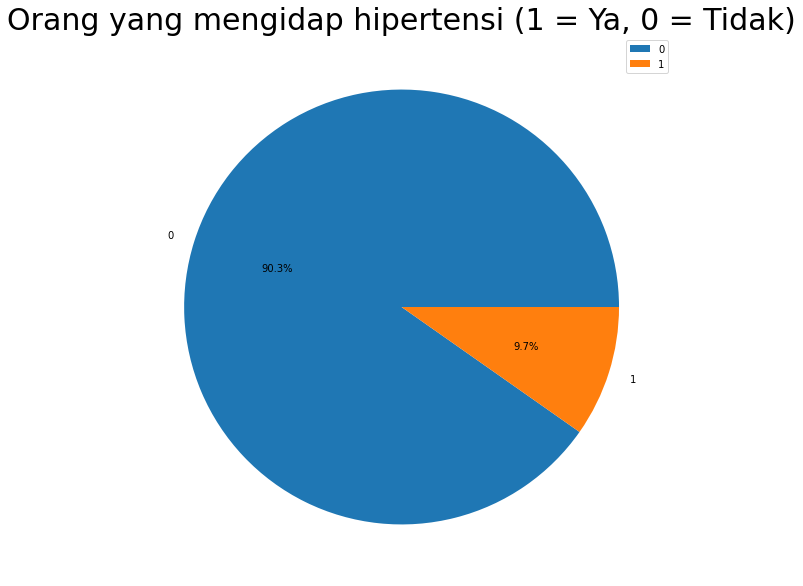

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['hypertension'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Orang yang mengidap hipertensi (1 = Ya, 0 = Tidak)", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Jumlah hipertensi terhadap stroke

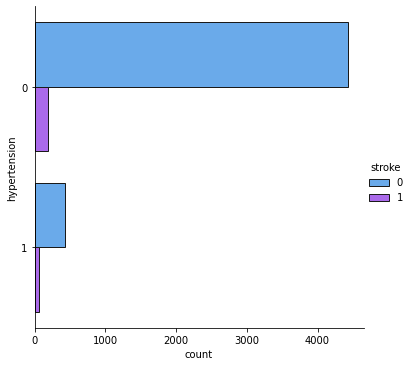

In [ ]:
sns.catplot(y="hypertension", hue="stroke", kind="count", palette="cool", edgecolor=".1", data=ds)

c. Persentase penyakit hipertensi dengan stroke

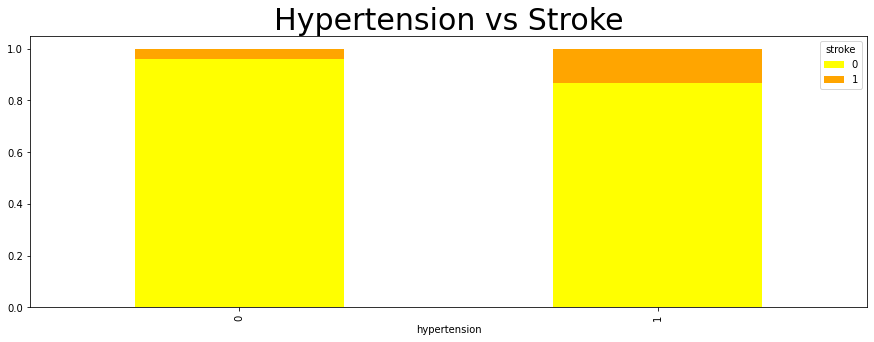

In [ ]:
hyper = pd.crosstab(ds['hypertension'], ds['stroke'], normalize='index')

hyper.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['yellow', 'orange'])

plt.title("Hypertension vs Stroke", fontsize = 30)
plt.show()

**4. Eksplorasi Data Heart Disease**

a. Sebaran Heart Disease pada dataset

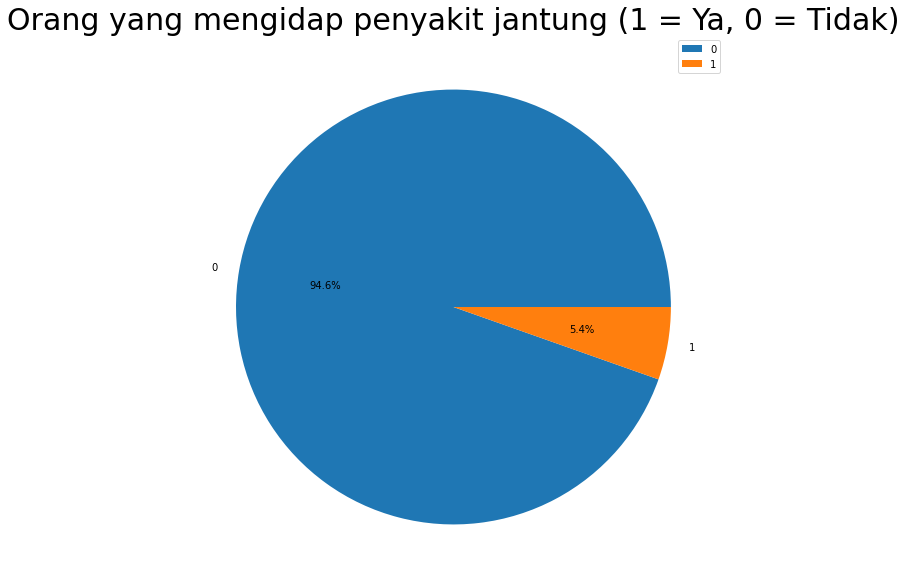

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['heart_disease'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Orang yang mengidap penyakit jantung (1 = Ya, 0 = Tidak)", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Jumlah heart disease terhadap stroke

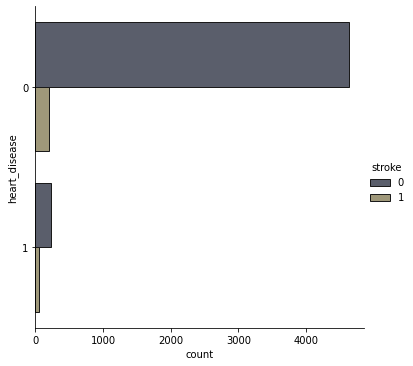

In [ ]:
sns.catplot(y="heart_disease", hue="stroke", kind="count", palette="cividis", edgecolor=".1", data=ds)

c. Persentase heart disease terhadap stroke

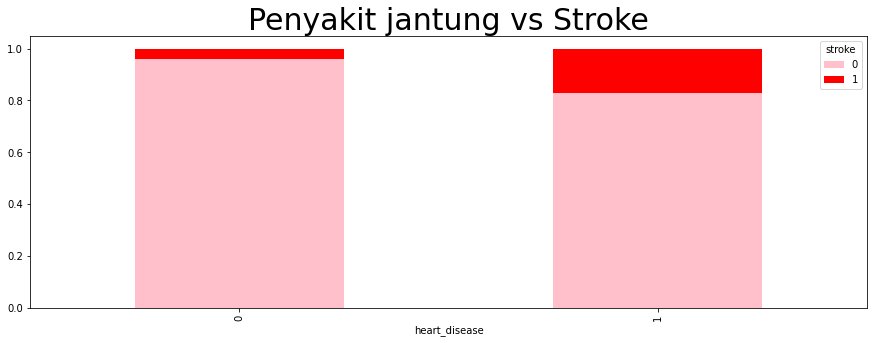

In [ ]:
jantung = pd.crosstab(ds['heart_disease'], ds['stroke'], normalize='index')

jantung.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'red'])

plt.title("Penyakit jantung vs Stroke", fontsize = 30)
plt.show()

**5. Eksplorasi Data Ever Married**

a. Sebaran ever married pada dataset

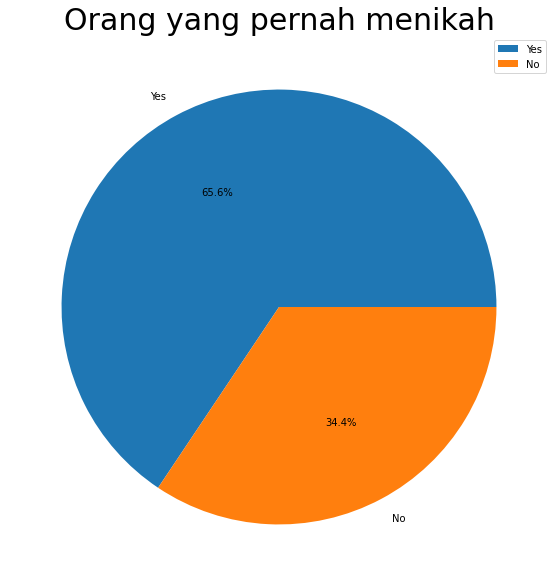

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['ever_married'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Orang yang pernah menikah", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Hubungan ever married dengan stroke

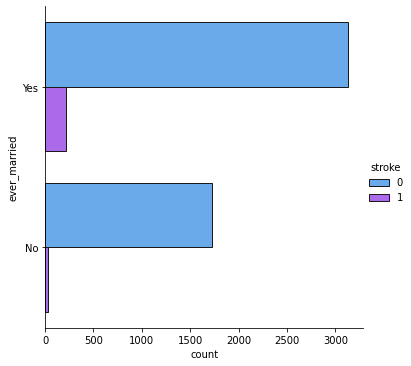

In [ ]:
sns.catplot(y="ever_married", hue="stroke", kind="count", palette="cool", edgecolor=".1", data=ds)

c. Persentase ever married dengan stroke

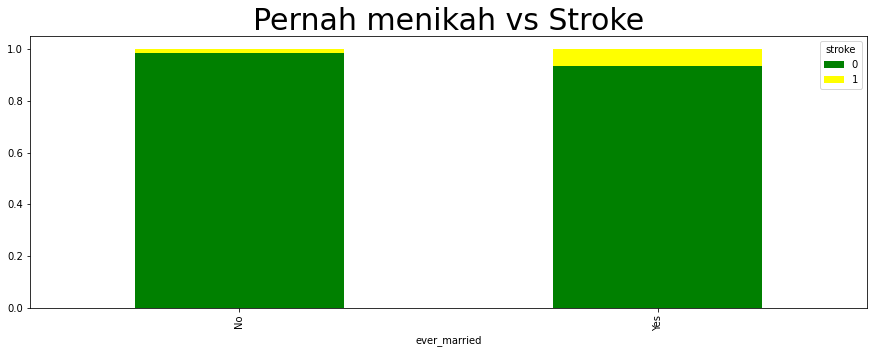

In [ ]:
nikah = pd.crosstab(ds['ever_married'], ds['stroke'], normalize='index')

nikah.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['green', 'yellow'])

plt.title("Pernah menikah vs Stroke", fontsize = 30)
plt.show()

**6. Eksplorasi Work Type**

a. Sebaran work type pada dataset

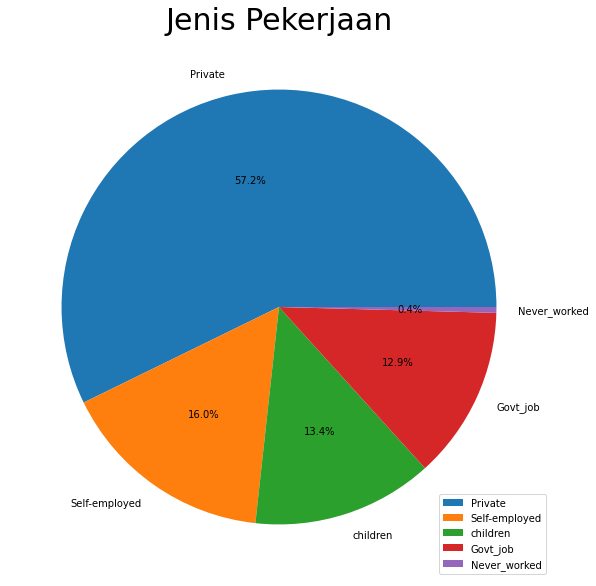

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['work_type'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Jenis Pekerjaan", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Hubungan jenis pekerjaan dengan stroke

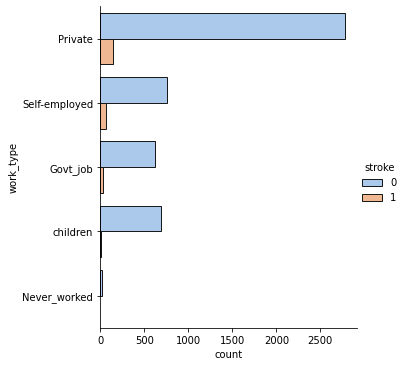

In [ ]:
sns.catplot(y="work_type", hue="stroke", kind="count", palette="pastel", edgecolor=".1", data=ds)

c. Persentase jenis pekerjaan terhadap stroke

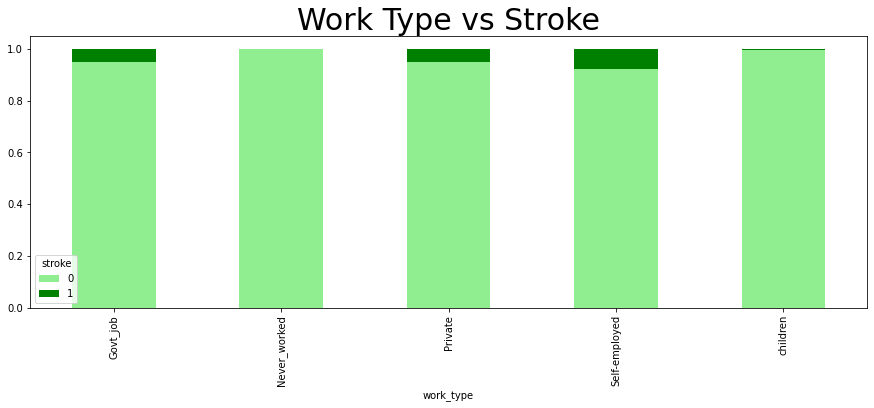

In [ ]:
work = pd.crosstab(ds['work_type'], ds['stroke'], normalize='index')

work.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])

plt.title("Work Type vs Stroke", fontsize = 30)
plt.show()

**7. Eksplorasi Residence type**

a. Sebaran residence level pada dataset

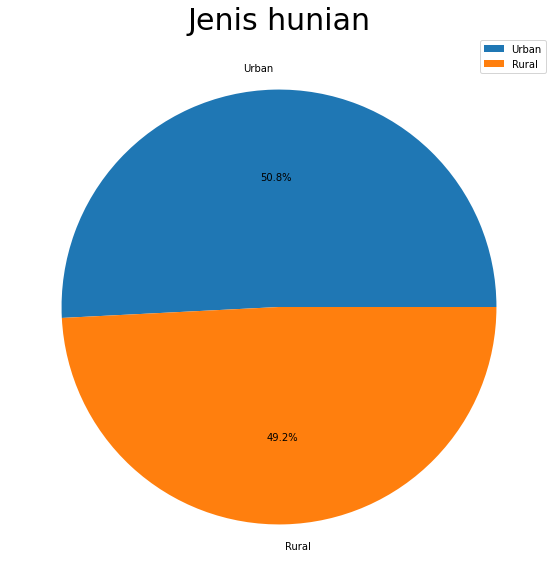

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['Residence_type'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Jenis hunian", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Hubungan jenis hunian dengan stroke

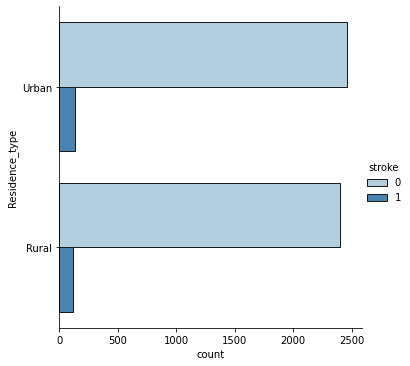

In [ ]:
sns.catplot(y="Residence_type", hue="stroke", kind="count",palette="Blues", edgecolor=".1",data=ds)

c. Persentase jenis hunian dengan stroke

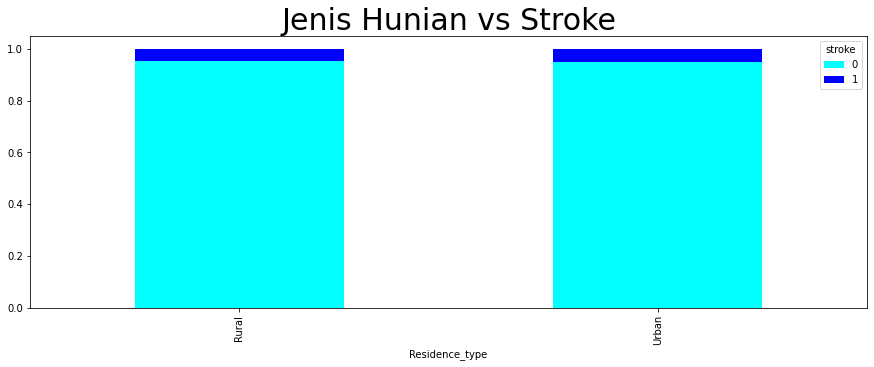

In [ ]:
residence = pd.crosstab(ds['Residence_type'], ds['stroke'], normalize='index')

residence.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['cyan', 'blue'])

plt.title("Jenis Hunian vs Stroke", fontsize = 30)
plt.show()

**8. Eksplorasi Smoking Type**

a. Sebaran Smoking Type di dataset

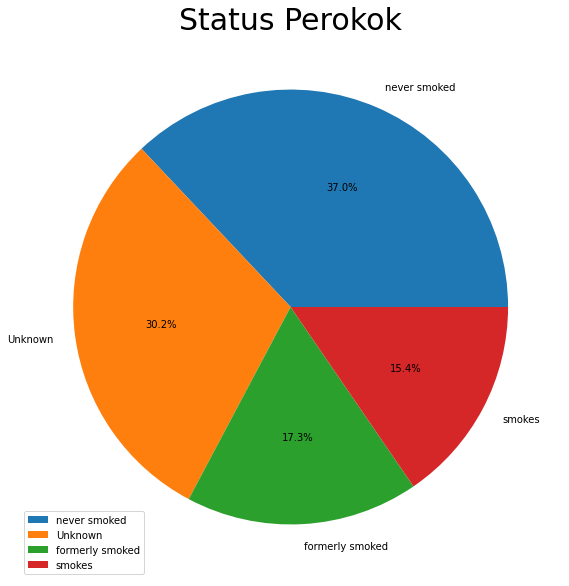

In [ ]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)

ds['smoking_status'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title("Status Perokok", fontdict={'fontsize' : '30'})

ax1.axis('off')
ax1.legend()

b. Hubungan smoking type dan stroke

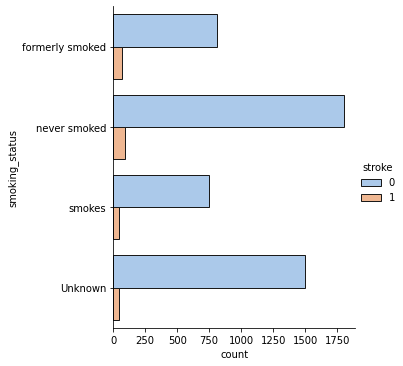

In [ ]:
sns.catplot(y="smoking_status", hue="stroke", kind="count", palette="pastel", edgecolor=".1",data=ds)

c. Persentase smoking type dan stroke

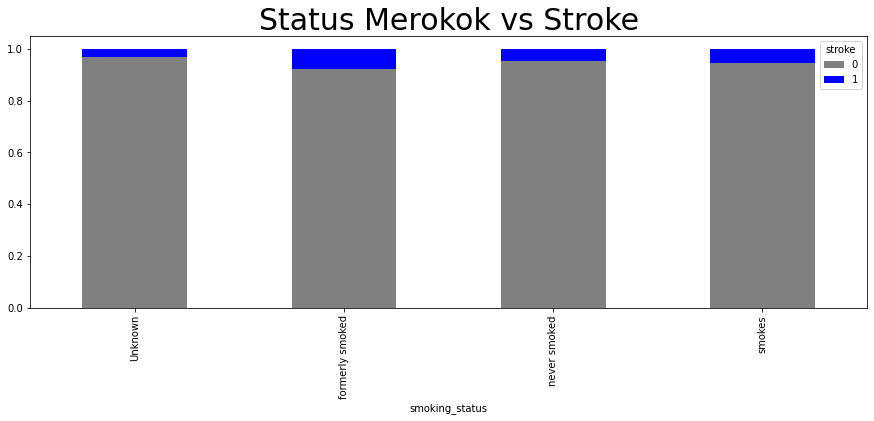

In [ ]:
smoking = pd.crosstab(ds['smoking_status'], ds['stroke'], normalize='index')

smoking.plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['gray', 'blue'])

plt.title("Status Merokok vs Stroke", fontsize = 30)
plt.show()

**9. Eksplorasi Data Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Umur')

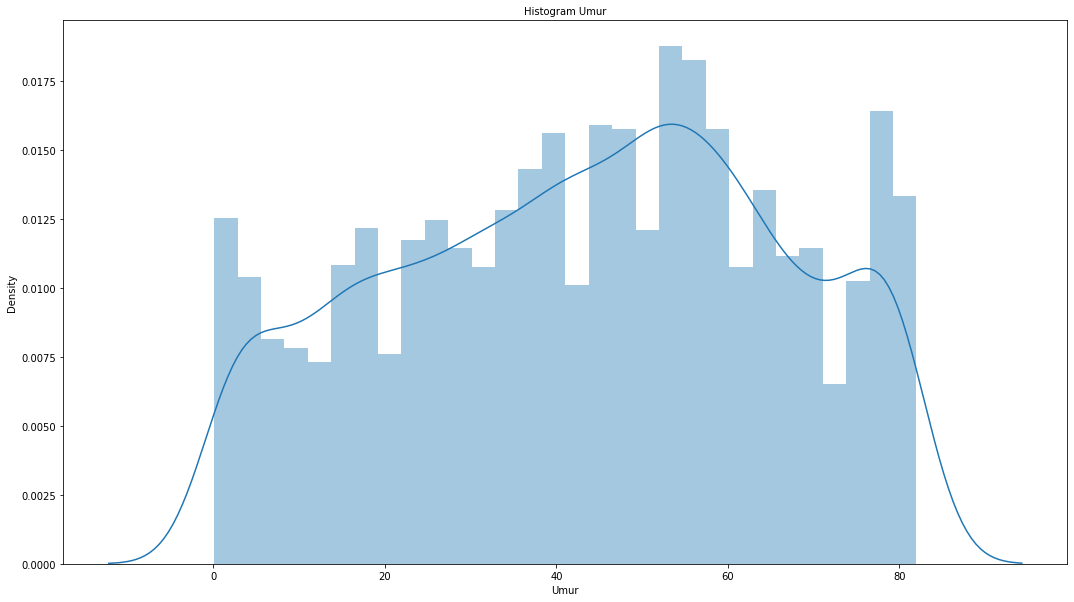

In [ ]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(111)

sns.distplot(a=ds['age'], bins=30, ax=ax1)
ax1.set_title("Histogram Umur", fontdict = {'fontsize' : '10'})
ax1.set_xlabel("Umur")

**10. Sebaran Data Average Glucose Level**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Level Glukosa')

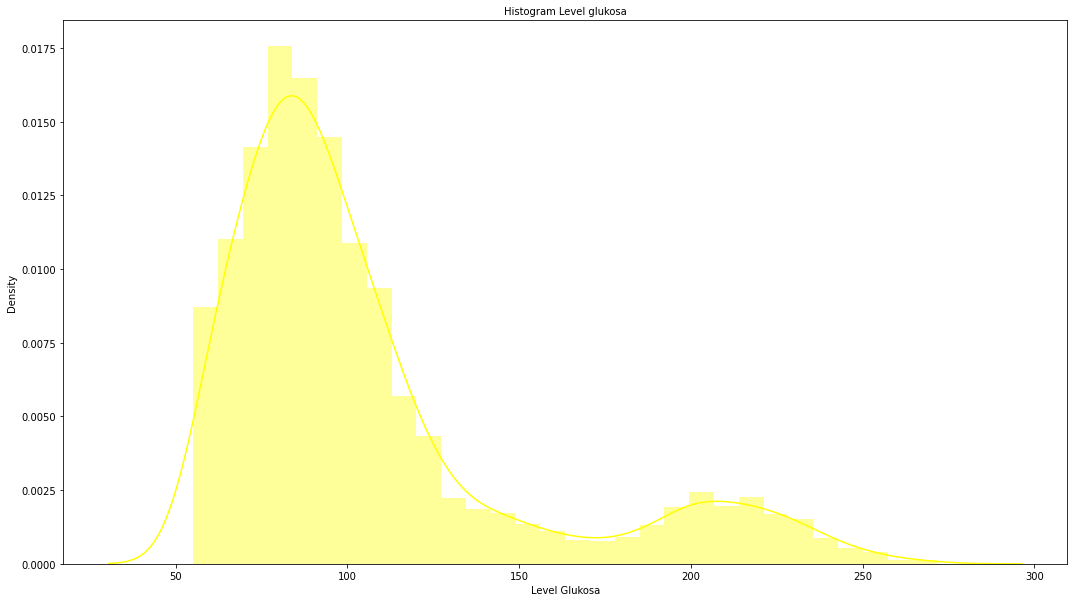

In [ ]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(111)

sns.distplot(a=ds['avg_glucose_level'], bins=30, ax=ax1, color = 'yellow')
ax1.set_title("Histogram Level glukosa", fontdict = {'fontsize' : '10'})
ax1.set_xlabel("Level Glukosa")

**11. Sebaran Data BMI**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Tingkat BMI')

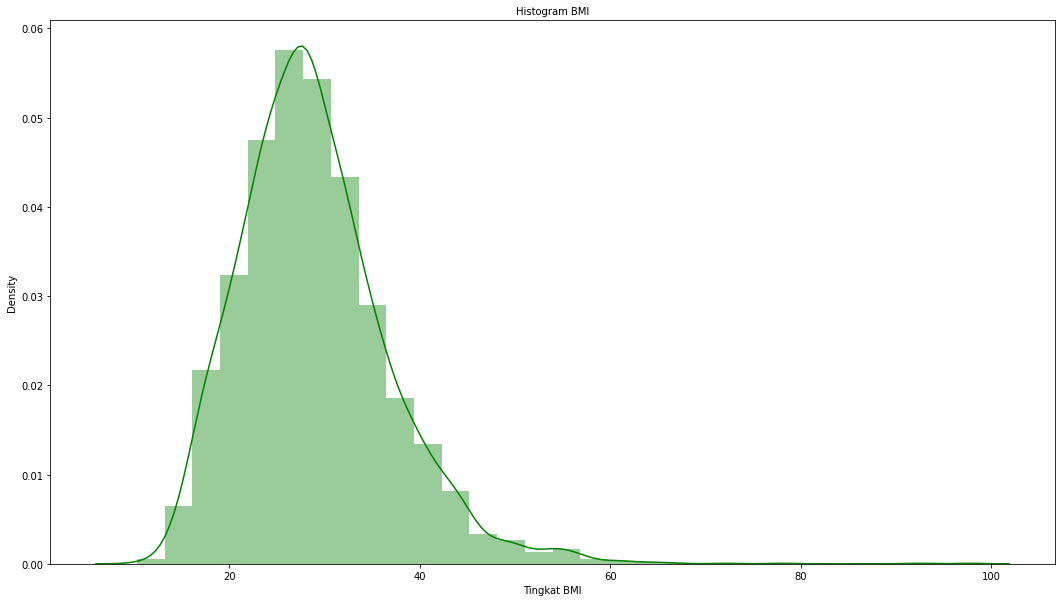

In [ ]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(111)

sns.distplot(a=ds['bmi'], bins=30, ax=ax1, color='green')
ax1.set_title("Histogram BMI", fontdict = {'fontsize' : '10'})
ax1.set_xlabel("Tingkat BMI")

**12. Hubungan BMI dan Age terhadap Stroke**

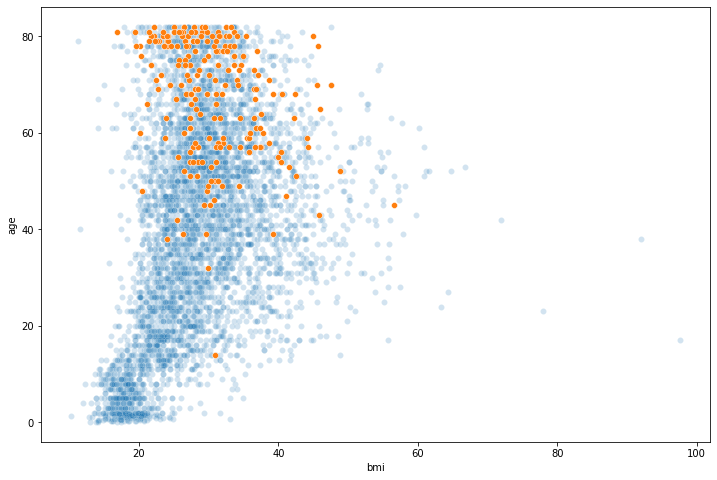

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.2, data=ds[ds['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=ds[ds['stroke'] == 1], ax=ax)

plt.show()

**13. Hubungan BMI dan Glucose Level terhadap Stroke**

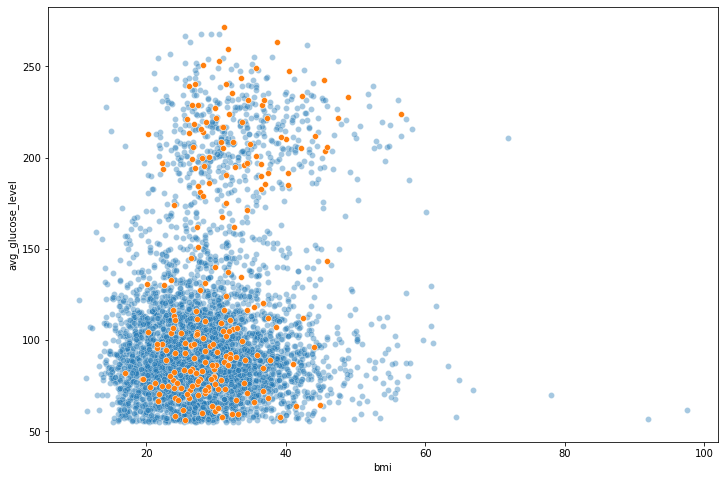

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=ds[ds['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=ds[ds['stroke'] == 1], ax=ax)

plt.show()

**14. Hubungan age dan glucose level terhadap stroke**

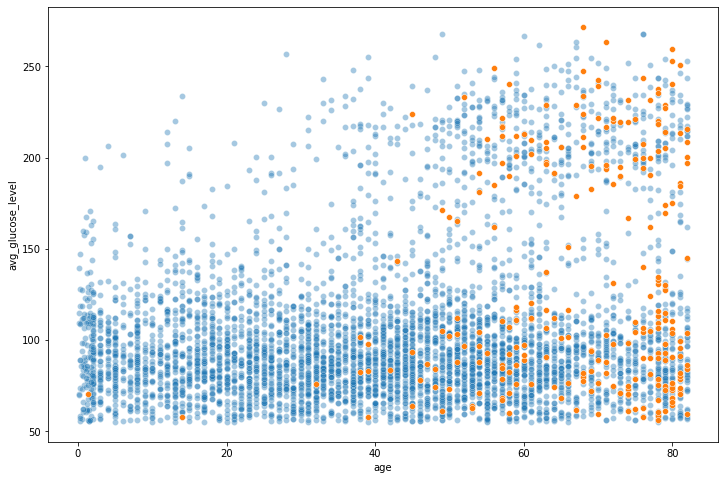

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="age", y="avg_glucose_level", alpha=0.4, data=ds[ds['stroke'] == 0])
sns.scatterplot(x="age", y="avg_glucose_level", alpha=1, data=ds[ds['stroke'] == 1], ax=ax)

plt.show()

# Data Preprocessing

**1. Membulatkan Usia**

Pada dataset, terdapat beberapa data dimana usia tidak dalam bilangan bulat. Hal ini harus dibersihkan untuk memudahkan proses pengolahan data selanjutnya

In [ ]:
ds['age'] = ds['age'].apply(lambda x : round(x))

**2. Menghapus gender "Other"**

Pada kolom "gender", terdapa value "other". Hal ini tidak mungkin mengingat hanya ada 2 gender sehingga data "other" harus dihapus

In [ ]:
ds['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
ds.drop(ds[ds['gender'] == 'Other'].index, inplace = True)
ds['gender'].unique()

array(['Male', 'Female'], dtype=object)

**3. Menghapus BMI yang termasuk outlier**

Text(0.5, 1.0, 'Boxplot BMI')

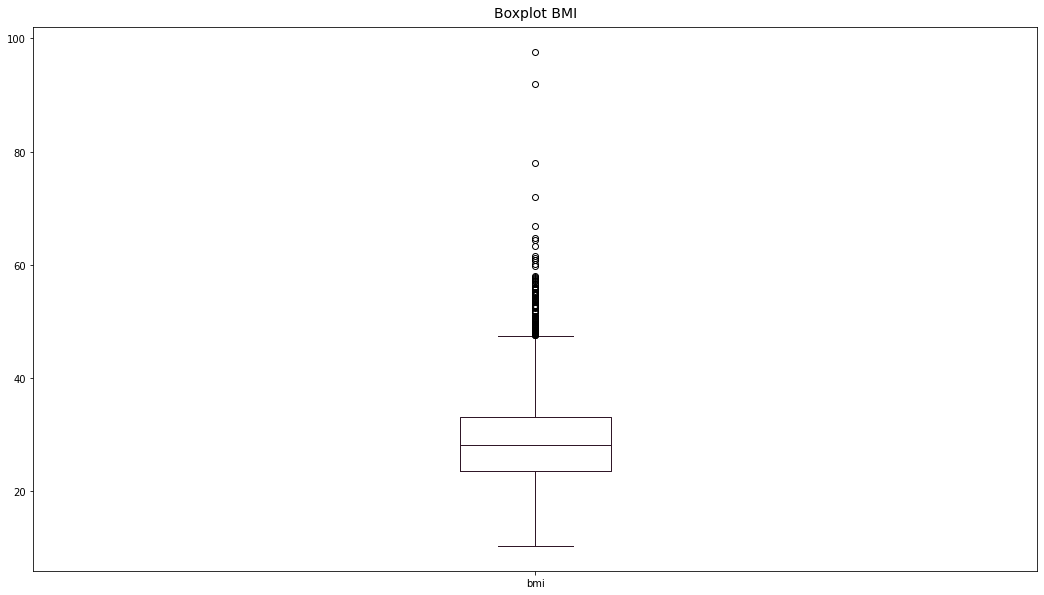

In [ ]:
fig = plt.figure(figsize=(18,10))

# bagi menjadi empat buah bagian
ax1 = fig.add_subplot(111)


# plot tiap data (declare ax=...)
ds['bmi'].plot(kind='box', ax=ax1, color='#301728FF')

# beri judul dari tiap data
ax1.set_title("Boxplot BMI", fontdict={'fontsize': '14'}, pad = 10)


Dari boxplot diatas dapat dilihat bahwa outlier BMI bernilai sekitar >45, maka nilai ini harus dibersihkan

In [ ]:
ds['bmi'] = ds['bmi'].apply(lambda bmi_value: bmi_value if bmi_value < 45 else np.nan)


**4. Mengisi BMI yang dihapus sebelumnya berdasarkan umur dan gender menggunakan Decision Tree**




BMI yang telah dihapus sebelumnya harus diisi. Pengisian dapat menggunakan algoritma prediksi Decision Tree. Kelebihan dari metode ini adalah hasil dari pengisian missing value sangat akurat meskipun butuh komputasi yang cukup rumit. Decision Tree yang digunakan memperhatikan hubungan BMI dengan age dan gender.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

pengisi_bmi = Pipeline( steps=[('scale',StandardScaler()),('lr',DecisionTreeRegressor(random_state=42))])
X = ds[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
pengisi_bmi.fit(X,Y)
predicted_bmi = pd.Series(pengisi_bmi.predict(Missing[['age','gender']]),index=Missing.index)
ds.loc[Missing.index,'bmi'] = predicted_bmi

In [ ]:
ds.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**5. Mengubah kategorikal menjadi numerik dengan one hot encoding**

Proses data preprocessing selanjutnya yang harus dilakukan adalah mengubah nilai kategorikal menjadi numerik dengan Label Encoder. Proses ini wajib dilakukan untuk melakukan proses data preprocessing setelah ini yaitu menyeimbangkan data pada kolom stroke yang imbalance

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds['gender'] = le.fit_transform(ds['gender'])
ds['ever_married'] = le.fit_transform(ds['ever_married'])
ds['work_type'] = le.fit_transform(ds['work_type'])
ds['Residence_type'] = le.fit_transform(ds['Residence_type'])
ds['smoking_status'] = le.fit_transform(ds['smoking_status'])


**6. Menggunakan SMOTE untuk oversampling data stroke agar data tidak imbalance**

Proses ini merupakan proses yang sangat penting dan sangat berpengaruh terhadap keakuratan dari hasil analitika data nantinya. Pada data exploratory sebelumnya kita telah melakukan eksplorasi dengan melihat sebaran data pada kolom stroke

Metode yang dilakukan untuk proses ini adalah SMOTE (Synthetic Minority Oversampling Technique). Cara kerja metode ini nantinya akan membuat nilai 1 pada kolom stroke, dalam hal ini penderita stroke, menjadi oversampling dan memiliki jumlah yang kurang lebih seimbang dengan non-penderita stroke.

In [ ]:
X = ds.drop(columns=['id', 'stroke'])
y = ds['stroke']

In [ ]:
ds.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X , y = ds.drop(columns=['id', 'stroke']), ds["stroke"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)



print("Sebelum OverSampling, jumlah dari label '1': {}".format(sum(y==1)))
print("Sebelum OverSampling, jumlah dari label '0': {} \n".format(sum(y==0)))

print('Setelah OverSampling, shape dari train_X: {}'.format(X_train_res.shape))
print('Setelah OverSampling, shape dari train_y: {} \n'.format(y_train_res.shape))

print("Setelah OverSampling, jumlah dari label '1': {}".format(sum(y_train_res==1)))
print("Setelah OverSampling, jumlah dari label '0': {}".format(sum(y_train_res==0)))

Sebelum OverSampling, jumlah dari label '1': 249
Sebelum OverSampling, jumlah dari label '0': 4860 

Setelah OverSampling, shape dari train_X: (6814, 10)
Setelah OverSampling, shape dari train_y: (6814,) 

Setelah OverSampling, jumlah dari label '1': 3407
Setelah OverSampling, jumlah dari label '0': 3407


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Setelah proses ini selesai, maka keseluruhan data preprocessing telah selesai. Dataset siap dianalisis dan diolah lebih lanjut

**Feature Selection**

Feature selection adalah teknik untuk memilih feature atau variabel yang akan digunakan untuk membuat model. Tujuan dari feature selection ini adalah agar model yang kita buat lebih sederhana dengan hasil yang lebih akurat dibanding tanpa feature selection. Cara kerja dari feature selection adalah memilih feature yang memiliki nilai importance tinggi untuk dimasukkan kedalam variabel independen model. Feature yang nilai importance rendah akan dihapus karena tidak terlalu berpengaruh pada model.

Berbagai metode feature selection dapat digunakan, seperti dengan chi-square model, pearson correlation, atau spearman correlation. Pada tugas kali ini, penulis menggunakan metode chi-square

In [ ]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

list_one=[]
feature_ranking=SelectKBest(chi2, k=5)
fit=feature_ranking.fit(X, y)


for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))

df0bj = pd.DataFrame(list_one)
df0bj.sort_values(by=[0], ascending=False)

,0,1
1,3633.598166,age
7,1719.368180,avg_glucose_level
3,87.957296,heart_disease
2,75.418319,hypertension
8,21.187357,bmi
4,20.595671,ever_married
9,3.365543,smoking_status
5,2.927120,work_type
6,0.597112,Residence_type
0,0.246877,gender


Sebelumnya harus ditentukan sampai nilai importance berapa kita mendefinisikan suatu feature itu penting atau tidak. Dari hasil diatas, penulis menentukan bahwa nilai suatu feature importance saat diatas 20. Maka, variabel yang dimasukkan kedalam model adalah age, average glucose level, heart disease, hypertension, BMI, dan ever married. Dari feature selection ini kita juga mengetahui faktor apa yang sangat mempengaruhi risiko seseorang terkena stroke, namun hal ini selanjutnya akan divalidasi di model Regresi Lasso nantinya.

# Modelling with Feature Selection

Setelah pemilihan feature yang ingin dimasukkan ke model, dilakukan proses pemisahan pendefinisian ulang X dan y serta proses splitting data ulang. Perintah yang dijalankan adalah sebagai berikut

In [ ]:
X_edit = ds.drop(columns=['id', 'stroke','work_type','Residence_type','gender','smoking_status'])
y_edit = ds['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_edit_train, X_edit_test, y_edit_train, y_edit_test = train_test_split(X_edit, y_edit, test_size=0.3, random_state=42)

sm = SMOTE()
X_edit_train_res, y_edit_train_res = sm.fit_resample(X_edit_train,y_edit_train)

print("Shape of x_train :", X_edit_train_res.shape)
print("Shape of y_train :", y_edit_train_res.shape)
print("Shape of x_test :", X_edit_test.shape)
print("Shape of y_test :", y_edit_test.shape)

Shape of x_train : (6832, 6)
Shape of y_train : (6832,)
Shape of x_test : (1533, 6)
Shape of y_test : (1533,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Metode prediksi yang digunakan pada project ini ada 3, yaitu

**a. Random Forest**
Random Forest adalah salah satu model paling umum digunakan dalam task klasifikasi. Pada dasarnya, model ini adalah model Decision Tree namun dilakukan banyak Decision Tree secara random (maka dari itu dinamakan Random Forest) yang mana output klasifikasi didasarkan pada vote terbanyak dari Decision Tree yang terbentuk.

**b. Logistic Regresion**
Regresi logistik adalah salah satu model klasifikasi yang digunakan untuk memprediksi probabilitas kejadian suatu peristiwa dengan mencocokkan data pada fungsi logit kurva logistik.

**c. Decision Tree**
Decision Tree adalah salah satu model klasifikasi. Cara kerjanya adalah dalam menginterpretasikan hasil pohon klasifikasi, sering kali pengguna tertarik tidak hanya pada prediksi kelas (klasifikasi), tetapi juga pada proporsi kelas di antara training set yang masuk pada kelas tersebut. Maka model Decision Tree cocok untuk digunakan

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ds_rf = RandomForestClassifier()
ds_rf.fit(X_edit_train_res, y_edit_train_res)

y_ds_rf = ds_rf.predict(X_edit_test)

print("Akurasi data train metode Random Forest:", ds_rf.score(X_edit_train_res, y_edit_train_res))
print("Akurasi data test dari metode Random Forest:", ds_rf.score(X_edit_test,y_edit_test))

Akurasi data train metode Random Forest: 1.0
Akurasi data test dari metode Random Forest: 0.9093281148075668


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

ds_lr = LogisticRegression()

ds_lr.fit(X_edit_train_res,y_edit_train_res)

# Melakukan prediksi test data pada model
y_ds_lr = ds_lr.predict(X_edit_test)

# Periksa akurasi
print("Akurasi data train metode Random Forest:", ds_lr.score(X_edit_train_res, y_edit_train_res))
print("Akurasi dari metode Logistic Regression: ", ds_lr.score(X_edit_test,y_edit_test))

Akurasi data train metode Random Forest: 0.7871779859484778
Akurasi dari metode Logistic Regression:  0.7403783431180692


Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
ds_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
# Membangun model dengan melakukan fit train data pada Decision Tree
dt = ds_dt.fit(X_edit_train_res,y_edit_train_res)

# Melakukan prediksi test data pada model
y_ds_dt = ds_dt.predict(X_edit_test)

print("Akurasi data train metode Decision Tree:", ds_dt.score(X_edit_train_res, y_edit_train_res))
print("Akurasi data test metode Decision Tree: ", ds_dt.score(X_edit_test,y_edit_test))

Akurasi data train metode Decision Tree: 0.8689988290398126
Akurasi data test metode Decision Tree:  0.786692759295499


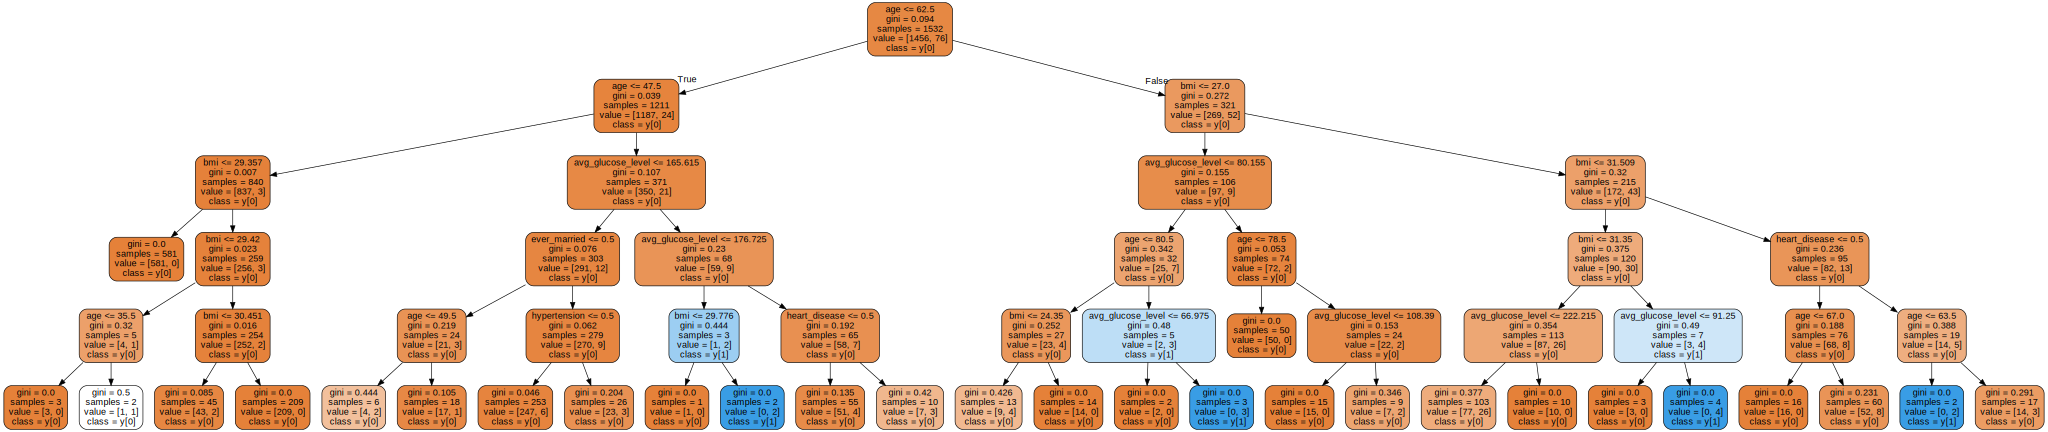

In [ ]:
# Membuat gambar decision tree yang  lebih jelas
import graphviz

# DOT data
dot_data = tree.export_graphviz(dt, 
                                feature_names=X_edit_train.columns, 
                                class_names=True, 
                                rounded=True,
                                filled=True)

# Menggambar decision tree
graph = graphviz.Source(dot_data, format="jpg") 
graph

**Regresi Lasso**

Selain melakukan klasifikasi untuk menentukan penyakit stroke seseorang, diawal juga telah ditentukan bahwa penulis ingin menentukan variabel apa yang paling berpengaruh terhadap penyakit stroke. Nantinya akan digunakan satu model regresi untuk melihat variabel independen yang paling berpengaruh terhadap variabel dependen. Model regresi yang digunakan adalah model Regresi Lasso. Regresi lasso adalah model regresi yang memiliki cara kerja menyusutkan koefisien regresi dari variabel bebas yang memiliki korelasi tinggi menjadi tepat pada nol atau mendekati nol. Model Lasso cocok untuk dataset yang memiliki banyak kolom seperti dataset penyakit stroke ini

In [ ]:
#membangun fungsi regresi lasso dengan linear_model
from sklearn.linear_model import Lasso

ds_las = Lasso(alpha=0.5, max_iter=200000000) #menspesifikasikan hyperparameter model

ds_las.fit(X_edit_train_res, y_edit_train_res)

#menampilkan koefisien dan konstanta regresi
lasso_result = pd.DataFrame()
predictor = ['intercept'] + list(X_edit.columns)
coef = [ds_las.intercept_] + list(ds_las.coef_)

lasso_result['predictor'] = predictor
lasso_result['coefficient'] = coef

# tampilkan dataframe
lasso_result

,predictor,coefficient
0,intercept,-0.258891
1,age,0.011662
2,hypertension,0.000000
3,heart_disease,0.000000
4,ever_married,-0.000000
5,avg_glucose_level,0.000967
6,bmi,-0.000000


# Evaluation with Feature Selection

**1. Confusion Matrix**

Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Terdapat beberapa istilah yang digunakan dalam confusion matrix ini

1. True Positive (TP): data positif/yes/1 yang diprediksi benar
2. True Negative (TN): data negative /no/0 terprediksi benar
3. False Positive (FP): data positif/yes/1 yang diprediksi salah. Merupakan Error Tipe I
4. False Negative (FN): data negatif/yes/0 yang diprediksi salah. Merupakan Error Tipe I

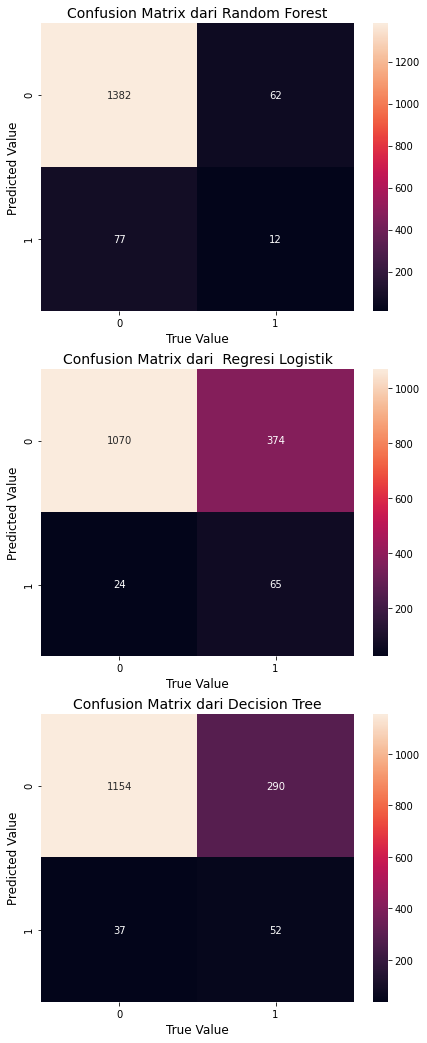

In [ ]:

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,18))
# membagi kanvas menjadi 3 bagian karena kita ingin membandingkan tiga model
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# ambil data
# untuk model Random Forest
cm_rf = confusion_matrix(y_edit_test, y_ds_rf) # (y test, y hasil prediksi)
# untuk model Regresi Logistik
cm_lr = confusion_matrix(y_edit_test, y_ds_lr)
# untuk model Decision Tree
cm_dt = confusion_matrix(y_edit_test, y_ds_dt)

# visualisasi heatmap
# untuk model Random Forest
sns.heatmap(cm_rf, ax=ax1, annot = True, fmt='.0f')
# untuk model Regresi Logistik
sns.heatmap(cm_lr, ax=ax2, annot = True, fmt='.0f')
# untuk model Decision Tree
sns.heatmap(cm_dt, ax=ax3, annot = True, fmt='.0f')

# memberi judul
ax1.set_title("Confusion Matrix dari Random Forest", fontdict={'fontsize': '14'})
ax2.set_title("Confusion Matrix dari  Regresi Logistik", fontdict={'fontsize': '14'})
ax3.set_title("Confusion Matrix dari Decision Tree", fontdict={'fontsize': '14'})
ax1.set_xlabel("True Value", fontdict={'fontsize': '12'})
ax1.set_ylabel("Predicted Value", fontdict={'fontsize': '12'})
ax2.set_xlabel("True Value", fontdict={'fontsize': '12'})
ax2.set_ylabel("Predicted Value", fontdict={'fontsize': '12'})
ax3.set_xlabel("True Value", fontdict={'fontsize': '12'})
ax3.set_ylabel("Predicted Value", fontdict={'fontsize': '12'})

plt.show()

**2. ROC**

Kurva ROC dibuat berdasarkan nilai telah didapatkan pada perhitungan dengan confusion matrix, yaitu antara False Positive Rate dengan True Positive Rate. Dimana: False Positive Rate (FPR) = FP / (FP + TN) True Positive Rate (TPR) = TP / (TP + FN)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# menghitung fpr dan tpr untuk semua thresholds dari klasifikasi
# Random Forest
probs_rf = ds_rf.predict_proba(X_edit_test)
preds_rf = probs_rf[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_edit_test, preds_rf)
# Regresi Logistik
probs_lr = ds_lr.predict_proba(X_edit_test)
preds_lr = probs_lr[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_edit_test, preds_lr)
# Decision Tree
probs_dt = ds_dt.predict_proba(X_edit_test)
preds_dt = probs_dt[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_edit_test, preds_dt)

# Menghitung Area Under Curve untuk tiap model
# Random Forest
auc_rf = roc_auc_score(y_edit_test, preds_rf)
print('AUC Random Forest: ', auc_rf)
# Regresi Logistik
auc_lr = roc_auc_score(y_edit_test, preds_lr)
print('AUC Regresi Logistik: ', auc_lr)
# Decision Tree
auc_dt = roc_auc_score(y_edit_test, preds_dt)
print('AUC Decision Tree: ', auc_dt)

AUC Random Forest:  0.7649358834697625
AUC Regresi Logistik:  0.8402922593295777
AUC Decision Tree:  0.7774751781879299


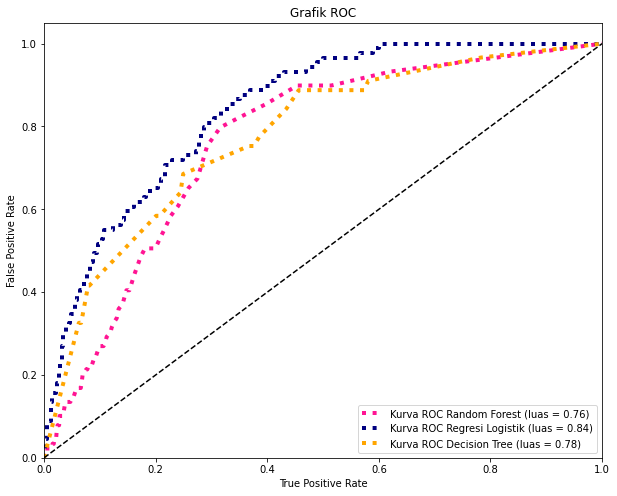

In [ ]:
# Menggambarkan plot ROC
# Membuat kanvas
plt.figure(figsize=(10,8))

# plot ROC untuk Random Forest
plt.plot(fpr_rf, tpr_rf,
         label='Kurva ROC Random Forest (luas = {0:0.2f})'
               ''.format(auc_rf),
         color='deeppink', linestyle=':', linewidth=4)

# plot ROC untuk Regresi Logistik
plt.plot(fpr_lr, tpr_lr,
         label='Kurva ROC Regresi Logistik (luas = {0:0.2f})'
               ''.format(auc_lr),
         color='navy', linestyle=':', linewidth=4)

# plot ROC untuk Decision Tree
plt.plot(fpr_dt, tpr_dt,
         label='Kurva ROC Decision Tree (luas = {0:0.2f})'
               ''.format(auc_dt),
         color='orange', linestyle=':', linewidth=4)

# Plot garis diagonal (AUC=0.5)
plt.plot([0, 1], [0, 1], 'k--')

# Set batas dan range sumbu x dan y
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#Memberi nama sumbu, judul
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Grafik ROC')

# Menambah legenda
plt.legend(loc="lower right")

# Menampilkan plot
plt.show()

**3. Accuracy**

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data. 
Sehingga rumusnya adalah TP+TF/(TP+TF+FP+FN)

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy: (tp + tn) / (p + n)
# Random Forest
accuracy_rf = accuracy_score(y_edit_test, y_ds_rf)
# Regresi Logistik
accuracy_lr = accuracy_score(y_edit_test, y_ds_lr)
# Decision Tree
accuracy_dt = accuracy_score(y_edit_test, y_ds_dt)

print('Accuracy Random Forest: ', accuracy_rf)
print('Accuracy Regresi Logistik: ', accuracy_lr)
print('Accuracy Decision Tree: ', accuracy_dt)

Accuracy Random Forest:  0.9093281148075668
Accuracy Regresi Logistik:  0.7403783431180692
Accuracy Decision Tree:  0.786692759295499


Classification Report

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_edit_test,y_ds_rf))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.16      0.13      0.15        89

    accuracy                           0.91      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.90      0.91      0.91      1533

Accuracy Score:  0.9093281148075668


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_edit_test,y_ds_lr))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_lr))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.74      1533
   macro avg       0.56      0.74      0.54      1533
weighted avg       0.93      0.74      0.81      1533

Accuracy Score:  0.7403783431180692


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_edit_test,y_ds_dt))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_dt))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1444
           1       0.15      0.58      0.24        89

    accuracy                           0.79      1533
   macro avg       0.56      0.69      0.56      1533
weighted avg       0.92      0.79      0.84      1533

Accuracy Score:  0.786692759295499


# Modelling with FS and Hyperparameter Tuning

Hyperparameter tuning adalah proses memilih hyperparameter untuk model-model agar memiliki hasil yang lebih akurat. Hyperparameter adalah parameter yang mempengaruhi output model dan tidak bergantung pada dataset.

**Random Forest**

Terdapat beberapa hyperparameter didalam model Random Forest. Penulis memilih beberapa hyperparameter yang akan di-tuning yaitu N estimator, max depth, dan bootstrap. Hal ini agar proses komputasi menjadi lebih sederhana dan ringan namun tetap menghasilkan suatu hyperparameter yang dapat membuat suatu model menjadi lebih akurat. N estimator adalah jumlah “pohon” yang ada didalam model. Setiap “pohon” diartikan sebagai “Decision Tree” dari Random Forest. Max depth adalah kedalaman informasi setiap “pohon”. Bootstrap adalah apakah suatu model menerapkan teknik pengambilan sampel statistik yang melibatkan pengambilan sampel acak dari kumpulan data dengan penggantian atau tidak.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

n_estimators =[32,64,100,128,200,400]
max_depth = [2,3,5,7,9]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_depth':max_depth,
             'bootstrap':bootstrap}

model_rf = RandomForestClassifier()



In [ ]:
grid = GridSearchCV(model_rf,param_grid)


In [ ]:
grid.fit(X_edit_train_res,y_edit_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_depth': 9, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ds_rf = RandomForestClassifier(bootstrap=False, max_depth=9, n_estimators=200)
ds_rf.fit(X_edit_train_res, y_edit_train_res)

y_ds_rf = ds_rf.predict(X_edit_test)

print("Akurasi data train metode Random Forest:", ds_rf.score(X_edit_train_res, y_edit_train_res))
print("Akurasi data test dari metode Random Forest:", ds_rf.score(X_edit_test,y_edit_test))

Akurasi data train metode Random Forest: 0.9361826697892272
Akurasi data test dari metode Random Forest: 0.8721461187214612


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_edit_test,y_ds_rf))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_rf))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.16      0.27      0.20        89

    accuracy                           0.88      1533
   macro avg       0.56      0.59      0.57      1533
weighted avg       0.91      0.88      0.89      1533

Accuracy Score:  0.8773646444879322


**Logistic REgression**

Terdapat beberapa hyperparameter didalam model Logistic Regresion. Penulis memilih beberapa hyperparameter yang akan di-tuning yaitu penalty dan C. Hal ini agar proses komputasi menjadi lebih sederhana dan ringan namun tetap menghasilkan suatu hyperparameter yang dapat membuat suatu model menjadi lebih akurat. Penalty adalah nilai regulasi yang mengatur model Logistic Regresion. C adalah nilai dari kekuatan penalty tersebut.

Proses hyperparameter tuning pada penelitian ini akan menggunakan GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

param_grid_lr = {'penalty': penalty, 
                  'C': C}
model_lr = LogisticRegression()
grid_lr = GridSearchCV(model_lr,param_grid_lr)

In [ ]:
grid_lr.fit(X_edit_train_res,y_edit_train_res)

In [ ]:
grid_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
from sklearn.linear_model import LogisticRegression

ds_lr = LogisticRegression(C=10,penalty='l2')

ds_lr.fit(X_edit_train_res,y_edit_train_res)

y_ds_lr = ds_lr.predict(X_edit_test)

# Periksa akurasi
print("Akurasi data train metode Random Forest:", ds_lr.score(X_edit_train_res, y_edit_train_res))
print("Akurasi dari metode Logistic Regression: ", ds_lr.score(X_edit_test,y_edit_test))

Akurasi data train metode Random Forest: 0.7769320843091335
Akurasi dari metode Logistic Regression:  0.7351598173515982


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_edit_test,y_ds_lr))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_lr))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.74      1533
   macro avg       0.56      0.74      0.54      1533
weighted avg       0.93      0.74      0.81      1533

Accuracy Score:  0.7403783431180692


**Decision Tree**

Terdapat beberapa hyperparameter didalam model Decision Tree. Penulis memilih beberapa hyperparameter yang akan di-tuning yaitu criterion, max depth, minimum samples leaf, dan presort. Hal ini agar proses komputasi menjadi lebih sederhana dan ringan namun tetap menghasilkan suatu hyperparameter yang dapat membuat suatu model menjadi lebih akurat. Criterion adalah fungsi kriteria dalam pengukuran kualitas splitting. Terdapat 2 jenis criterion yaitu gini yang melihat impurity data dan entropy yang melihat information gain. Max depth adalah kedalaman informasi setiap “pohon” Decision Tree. Minimum samples leaf adalah jumlah sampel minimum untuk setiap daun di “pohon” Decision Tree. Presort adalah pengaturan pada model Decision Tree untuk menentukan apakah proses splitting untuk mencari informasi terbaik akan dipercepat atau tidak.

Proses hyperparameter tuning pada penelitian ini akan menggunakan GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [2,3,5,7,9] 
criterion = ['gini','entropy']
min_samples_leaf = range(1,10)
presort = [True,False]

param_grid_dt = {'max_depth': max_depth,
                 'criterion': criterion,
                 'min_samples_leaf': min_samples_leaf,
                 'presort': presort}
model_dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(model_dt,param_grid_dt,cv=10)

In [ ]:
grid_dt.fit(X_edit_train_res,y_edit_train_res)

In [ ]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'presort': False}

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
ds_dt = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=2,presort=False)
# Membangun model dengan melakukan fit train data pada Decision Tree
dt = ds_dt.fit(X_edit_train_res,y_edit_train_res)

# Melakukan prediksi test data pada model
y_ds_dt = ds_dt.predict(X_edit_test)

print("Akurasi data train metode Decision Tree:", ds_dt.score(X_edit_train_res, y_edit_train_res))
print("Akurasi data test metode Decision Tree: ", ds_dt.score(X_edit_test,y_edit_test))

Akurasi data train metode Decision Tree: 0.9010538641686182
Akurasi data test metode Decision Tree:  0.8669275929549902


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_edit_test,y_ds_dt))

print('Accuracy Score: ',accuracy_score(y_edit_test,y_ds_dt))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1444
           1       0.18      0.35      0.23        89

    accuracy                           0.87      1533
   macro avg       0.57      0.62      0.58      1533
weighted avg       0.91      0.87      0.89      1533

Accuracy Score:  0.8669275929549902


**Regresi Lasso**

Terdapat beberapa hyperparameter didalam model Regresi Lasso. Penulis memilih beberapa hyperparameter yang akan di-tuning yaitu alpha dan max iteration. Alpha adalah nilai alfa yang ada pada model regresi pada umumnya, yaitu batas kesalahan yang dapat ditolerir. Max iteration adalah jumlah iterasi maksimal yang dilakukan saat proses regresi.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha = [0.2,0.4,0.5,0.7,0.9] 
max_iter = [1000,2000,10000,30000,50000,200000,500000]


param_grid_lasso = {'alpha': alpha,
                 'max_iter': max_iter}

model_lasso = Lasso()
grid_lasso = GridSearchCV(model_lasso,param_grid_lasso,cv=10)

In [ ]:
grid_lasso.fit(X_edit_train_res,y_edit_train_res)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.5, 0.7, 0.9],
                         'max_iter': [1000, 2000, 10000, 30000, 50000, 200000,
                                      500000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_lasso.best_params_

{'alpha': 0.9, 'max_iter': 1000}

In [ ]:
from sklearn.linear_model import Lasso

ds_las = Lasso(alpha=0.9, max_iter=1000) #menspesifikasikan hyperparameter model

ds_las.fit(X_edit_train_res, y_edit_train_res)

#menampilkan koefisien dan konstanta regresi
lasso_result = pd.DataFrame()
predictor = ['intercept'] + list(X_edit.columns)
coef = [ds_las.intercept_] + list(ds_las.coef_)

lasso_result['predictor'] = predictor
lasso_result['coefficient'] = coef

# tampilkan dataframe
lasso_result

,predictor,coefficient
0,intercept,-0.210743
1,age,0.010890
2,hypertension,0.000000
3,heart_disease,0.000000
4,ever_married,-0.000000
5,avg_glucose_level,0.000920
6,bmi,-0.000000


# Evaluation after tuning

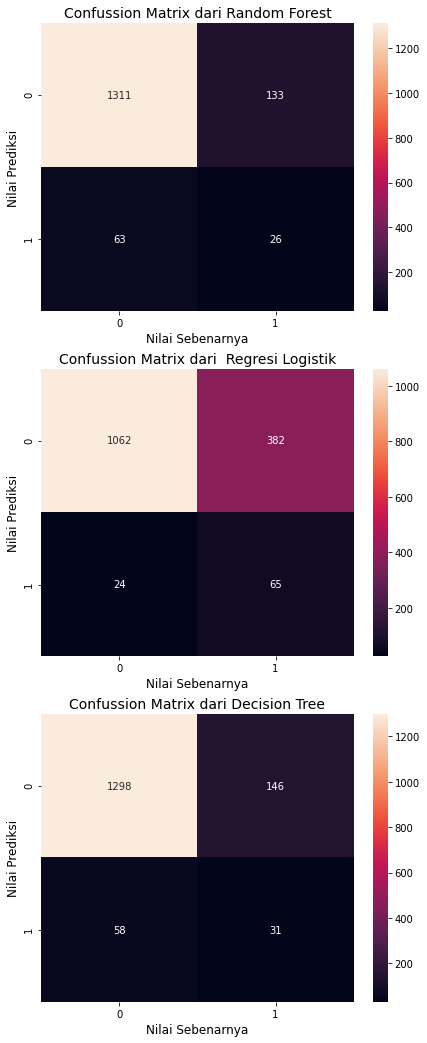

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

# membuat kanvas
fig = plt.figure(figsize=(7,18))
# membagi kanvas menjadi 3 bagian karena kita ingin membandingkan tiga model
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# ambil data
# untuk model Random Forest
cm_rf = confusion_matrix(y_edit_test, y_ds_rf) # (y test, y hasil prediksi)
# untuk model Regresi Logistik
cm_lr = confusion_matrix(y_edit_test, y_ds_lr)
# untuk model Decision Tree
cm_dt = confusion_matrix(y_edit_test, y_ds_dt)

# visualisasi heatmap
# untuk model Random Forest
sns.heatmap(cm_rf, ax=ax1, annot = True, fmt='.0f')
# untuk model Regresi Logistik
sns.heatmap(cm_lr, ax=ax2, annot = True, fmt='.0f')
# untuk model Decision Tree
sns.heatmap(cm_dt, ax=ax3, annot = True, fmt='.0f')

# memberi judul
ax1.set_title("Confussion Matrix dari Random Forest", fontdict={'fontsize': '14'})
ax2.set_title("Confussion Matrix dari  Regresi Logistik", fontdict={'fontsize': '14'})
ax3.set_title("Confussion Matrix dari Decision Tree", fontdict={'fontsize': '14'})
ax1.set_xlabel("Nilai Sebenarnya", fontdict={'fontsize': '12'})
ax1.set_ylabel("Nilai Prediksi", fontdict={'fontsize': '12'})
ax2.set_xlabel("Nilai Sebenarnya", fontdict={'fontsize': '12'})
ax2.set_ylabel("Nilai Prediksi", fontdict={'fontsize': '12'})
ax3.set_xlabel("Nilai Sebenarnya", fontdict={'fontsize': '12'})
ax3.set_ylabel("Nilai Prediksi", fontdict={'fontsize': '12'})

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(7,18))

ax1 = fig.add_subplot(111)

cm_rf = confusion_matrix(y_edit_test, y_ds_rf)

sns.heatmap(cm_rf, ax=ax1, annot = True, fmt='.0f')

ax1.set_title("Confusion Matrix dari Random Forest", fontdict={'fontsize': '14'})

ax1.set_xlabel("Nilai Sebenarnya", fontdict={'fontsize': '12'})
ax1.set_ylabel("Nilai Prediksi", fontdict={'fontsize': '12'})

plt.show()

AUC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# menghitung fpr dan tpr untuk semua thresholds dari klasifikasi
# Random Forest
probs_rf = ds_rf.predict_proba(X_edit_test)
preds_rf = probs_rf[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_edit_test, preds_rf)
# Regresi Logistik
probs_lr = ds_lr.predict_proba(X_edit_test)
preds_lr = probs_lr[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_edit_test, preds_lr)
# Decision Tree
probs_dt = ds_dt.predict_proba(X_edit_test)
preds_dt = probs_dt[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_edit_test, preds_dt)

# Menghitung Area Under Curve untuk tiap model
# Random Forest
auc_rf = roc_auc_score(y_edit_test, preds_rf)
print('AUC Random Forest: ', auc_rf)
# Regresi Logistik
auc_lr = roc_auc_score(y_edit_test, preds_lr)
print('AUC Regresi Logistik: ', auc_lr)
# Decision Tree
auc_dt = roc_auc_score(y_edit_test, preds_dt)
print('AUC Decision Tree: ', auc_dt)

AUC Random Forest:  0.79943742413396
AUC Regresi Logistik:  0.8399965763017834
AUC Decision Tree:  0.6868522207351614


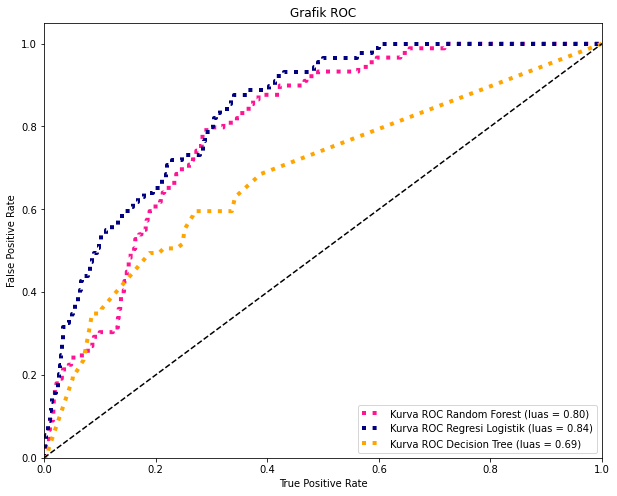

In [ ]:
# Menggambarkan plot ROC
# Membuat kanvas
plt.figure(figsize=(10,8))

# plot ROC untuk Random Forest
plt.plot(fpr_rf, tpr_rf,
         label='Kurva ROC Random Forest (luas = {0:0.2f})'
               ''.format(auc_rf),
         color='deeppink', linestyle=':', linewidth=4)

# plot ROC untuk Regresi Logistik
plt.plot(fpr_lr, tpr_lr,
         label='Kurva ROC Regresi Logistik (luas = {0:0.2f})'
               ''.format(auc_lr),
         color='navy', linestyle=':', linewidth=4)

# plot ROC untuk Decision Tree
plt.plot(fpr_dt, tpr_dt,
         label='Kurva ROC Decision Tree (luas = {0:0.2f})'
               ''.format(auc_dt),
         color='orange', linestyle=':', linewidth=4)

# Plot garis diagonal (AUC=0.5)
plt.plot([0, 1], [0, 1], 'k--')

# Set batas dan range sumbu x dan y
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#Memberi nama sumbu, judul
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Grafik ROC')

# Menambah legenda
plt.legend(loc="lower right")

# Menampilkan plot
plt.show()

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy: (tp + tn) / (p + n)
# Random Forest
accuracy_rf = accuracy_score(y_edit_test, y_ds_rf)
# Regresi Logistik
accuracy_lr = accuracy_score(y_edit_test, y_ds_lr)
# Decision Tree
accuracy_dt = accuracy_score(y_edit_test, y_ds_dt)

print('Accuracy Random Forest: ', accuracy_rf)
print('Accuracy Regresi Logistik: ', accuracy_lr)
print('Accuracy Decision Tree: ', accuracy_dt)

Accuracy Random Forest:  0.8721461187214612
Accuracy Regresi Logistik:  0.7351598173515982
Accuracy Decision Tree:  0.8669275929549902


Metode prediksi penyakit stroke seseorang yang terbaik adalah menggunakan Random Forest karena memiliki akurasi yang paling tinggi dibanding 2 metode lainnya. Selain itu, jumlah True Positive dan False Negative dari Random Forest adalah yang tertinggi sehingga tingkat kesalahannya dalam melakukan prediksi lebih kecil dibanding 2 metode lainnya